# Naive bayes

In [4]:
import pandas as pd

file_path = 'guardian_cleaned_dataset.csv'
df = pd.read_csv(file_path)

print(f"Dataset Shape: {df.shape}")
df.head()


Dataset Shape: (4425, 9)


,id,headline,section,publication_date,url,author,keywords,body_text,sentiment
0,politics/2025/feb/03/most-zero-hours-workers-w...,most zero-hours workers ‘with same employer fo...,Politics,2025-02-03T00:07:24Z,https://www.theguardian.com/politics/2025/feb/...,Gwyn Topham,"Trade unions, Zero-hours contracts, Employment...",hundreds thousands british workers zerohours c...,0.333333
1,politics/2025/feb/02/starmer-calls-on-european...,starmer calls on european leaders to put more ...,Politics,2025-02-02T22:30:23Z,https://www.theguardian.com/politics/2025/feb/...,Rowena Mason,"Foreign policy, Defence policy, Keir Starmer, ...",keir starmer called european leaders economic ...,0.233333
2,politics/2025/feb/02/keir-starmer-european-def...,keir starmer to discuss european defence with ...,Politics,2025-02-02T19:00:18Z,https://www.theguardian.com/politics/2025/feb/...,Jennifer Rankin in Brussels and Rowena Mason,"Defence policy, Foreign policy, Keir Starmer, ...",keir starmers hopes defence security pact risk...,0.000000
3,politics/2025/feb/02/cooper-defends-starmer-af...,cooper defends starmer after book says chief o...,Politics,2025-02-02T18:44:23Z,https://www.theguardian.com/politics/2025/feb/...,Rowena Mason Whitehall editor,"Keir Starmer, Morgan McSweeney, Yvette Cooper,...",keir starmers cabinet ministers said stands re...,0.000000
4,politics/2025/feb/02/eluned-morgan-south-wales...,‘reform is a challenge’: eluned morgan hits so...,Politics,2025-02-02T16:00:14Z,https://www.theguardian.com/politics/2025/feb/...,Steven Morris,"Eluned Morgan, Wales, Welsh politics, Labour, ...",welsh parliament elections year away minister ...,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# 1. Select relevant columns
df_filtered = df[['body_text', 'sentiment']].dropna()

# 2. Convert continuous sentiment to 3 categories: negative, neutral, positive
def convert_sentiment(score):
    if score < 0.15:
        return 0  # Negative
    elif score <= 0.35:
        return 1  # Neutral
    else:
        return 2  # Positive

df_filtered['sentiment_label'] = df_filtered['sentiment'].apply(convert_sentiment)

# 3. Vectorize text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df_filtered['body_text'])
y = df_filtered['sentiment_label'].values

# 4. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Show samples
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (3540, 5000)
Testing Set Size: (885, 5000)


In [ ]:
df_filtered[['body_text', 'sentiment', 'sentiment_label']].head(10)

,body_text,sentiment,sentiment_label
0,hundreds thousands british workers zerohours c...,0.333333,1
1,keir starmer called european leaders economic ...,0.233333,1
2,keir starmers hopes defence security pact risk...,0.000000,0
3,keir starmers cabinet ministers said stands re...,0.000000,0
4,welsh parliament elections year away minister ...,0.000000,0
5,labour called kemi badenoch shambles emerged f...,0.000000,0
6,keir starmer seek improve customs arrangements...,0.000000,0
7,labour faces losing scores seats reform uk eng...,0.800000,2
8,lady olga maitland conservative member sutton ...,0.000000,0
9,rachel reeves mp leeds west pudsey clear oppos...,-0.200000,0


In [ ]:
print("Training Labels:", y_train[:10])
print("Testing Labels:", y_test[:10])

Training Labels: [0 0 0 0 0 1 1 0 0 1]
Testing Labels: [2 0 2 0 0 0 0 0 0 0]


Modeling – Naïve Bayes

Multinomial NB Accuracy: 0.5469
Bernoulli NB Accuracy: 0.6441
Gaussian NB Accuracy: 0.4068


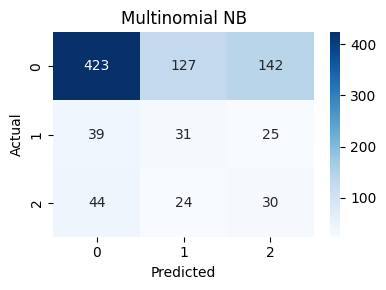

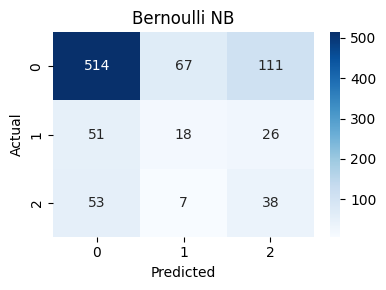

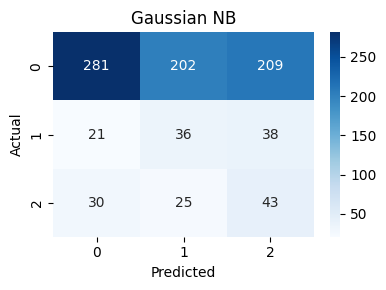

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Multinomial NB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

# 2. Bernoulli NB
bnb = BernoulliNB()
X_train_bin = X_train.copy()
X_train_bin[X_train_bin > 0] = 1
X_test_bin = X_test.copy()
X_test_bin[X_test_bin > 0] = 1
bnb.fit(X_train_bin, y_train)
y_pred_bnb = bnb.predict(X_test_bin)
acc_bnb = accuracy_score(y_test, y_pred_bnb)
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

# 3. Gaussian NB
gnb = GaussianNB()
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()
gnb.fit(X_train_dense, y_train)
y_pred_gnb = gnb.predict(X_test_dense)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Print accuracy scores
print(f"Multinomial NB Accuracy: {acc_mnb:.4f}")
print(f"Bernoulli NB Accuracy: {acc_bnb:.4f}")
print(f"Gaussian NB Accuracy: {acc_gnb:.4f}")

# Optional: Plot confusion matrices
def plot_cm(cm, title):
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

plot_cm(cm_mnb, "Multinomial NB")
plot_cm(cm_bnb, "Bernoulli NB")
plot_cm(cm_gnb, "Gaussian NB")


Accuracy Comparison Bar Chart

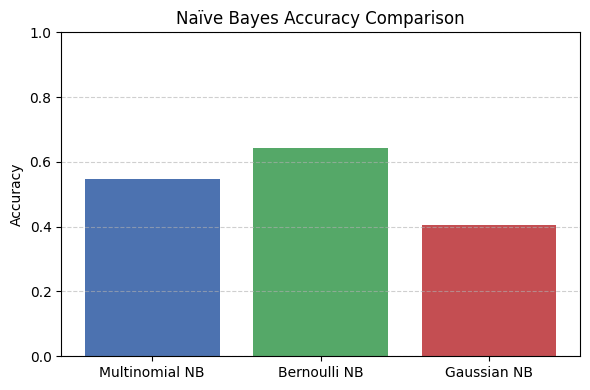

In [ ]:
import matplotlib.pyplot as plt

# Bar chart of accuracy comparison
models = ['Multinomial NB', 'Bernoulli NB', 'Gaussian NB']
accuracies = [acc_mnb, acc_bnb, acc_gnb]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['#4c72b0', '#55a868', '#c44e52'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Naïve Bayes Accuracy Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


 Classification Report as a Table

In [ ]:
from sklearn.metrics import classification_report

# Print reports for each model
print("Multinomial NB:\n", classification_report(y_test, y_pred_mnb))
print("Bernoulli NB:\n", classification_report(y_test, y_pred_bnb))
print("Gaussian NB:\n", classification_report(y_test, y_pred_gnb))

Multinomial NB:
               precision    recall  f1-score   support

           0       0.84      0.61      0.71       692
           1       0.17      0.33      0.22        95
           2       0.15      0.31      0.20        98

    accuracy                           0.55       885
   macro avg       0.39      0.41      0.38       885
weighted avg       0.69      0.55      0.60       885

Bernoulli NB:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       692
           1       0.20      0.19      0.19        95
           2       0.22      0.39      0.28        98

    accuracy                           0.64       885
   macro avg       0.41      0.44      0.42       885
weighted avg       0.70      0.64      0.67       885

Gaussian NB:
               precision    recall  f1-score   support

           0       0.85      0.41      0.55       692
           1       0.14      0.38      0.20        95
           2       0.15      

# Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df_filtered = df[['body_text', 'sentiment']].dropna()

def convert_sentiment(score):
    if score < 0.15:
        return 0  # Negative
    elif score <= 0.35:
        return 1  # Neutral
    else:
        return 2  # Positive

df_filtered['sentiment_label'] = df_filtered['sentiment'].apply(convert_sentiment)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df_filtered['body_text'])
y = df_filtered['sentiment_label'].values

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3540, 5000)
Testing set shape: (885, 5000)


In [ ]:
df_filtered[['body_text', 'sentiment', 'sentiment_label']].head(10)

,body_text,sentiment,sentiment_label
0,hundreds thousands british workers zerohours c...,0.333333,1
1,keir starmer called european leaders economic ...,0.233333,1
2,keir starmers hopes defence security pact risk...,0.000000,0
3,keir starmers cabinet ministers said stands re...,0.000000,0
4,welsh parliament elections year away minister ...,0.000000,0
5,labour called kemi badenoch shambles emerged f...,0.000000,0
6,keir starmer seek improve customs arrangements...,0.000000,0
7,labour faces losing scores seats reform uk eng...,0.800000,2
8,lady olga maitland conservative member sutton ...,0.000000,0
9,rachel reeves mp leeds west pudsey clear oppos...,-0.200000,0


In [ ]:
print("Training labels sample:", y_train[:10])
print("Testing labels sample:", y_test[:10])

Training labels sample: [0 0 0 0 0 1 1 0 0 1]
Testing labels sample: [2 0 2 0 0 0 0 0 0 0]


 Decision Tree Classifier

Decision Tree Accuracy: 0.6610


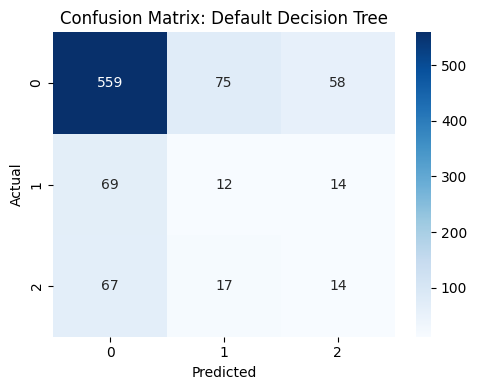

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train a default Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict
y_pred_dt = dtree.predict(X_test)

# Accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title("Confusion Matrix: Default Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions from the default Decision Tree
y_pred_default = dtree.predict(X_test)

# Accuracy
acc_default = accuracy_score(y_test, y_pred_default)
print(f"Decision Tree (Default - Gini) Accuracy: {acc_default:.4f}")

# Classification Report
report_default = classification_report(y_test, y_pred_default, target_names=["Negative", "Neutral", "Positive"])
print(report_default)

Decision Tree (Default - Gini) Accuracy: 0.6610
              precision    recall  f1-score   support

    Negative       0.80      0.81      0.81       692
     Neutral       0.12      0.13      0.12        95
    Positive       0.16      0.14      0.15        98

    accuracy                           0.66       885
   macro avg       0.36      0.36      0.36       885
weighted avg       0.66      0.66      0.66       885



In [ ]:
# Tree 1: Shallow tree (depth = 3)
tree_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth3.fit(X_train, y_train)
acc1 = accuracy_score(y_test, tree_depth3.predict(X_test))
print("Tree 1 (Max Depth = 3) Accuracy:", acc1)

# Tree 2: Entropy-based tree
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_entropy.fit(X_train, y_train)
acc2 = accuracy_score(y_test, tree_entropy.predict(X_test))
print("Tree 2 (Entropy-based) Accuracy:", acc2)

# Tree 3: Min samples split = 50
tree_minsplit = DecisionTreeClassifier(min_samples_split=50, random_state=42)
tree_minsplit.fit(X_train, y_train)
acc3 = accuracy_score(y_test, tree_minsplit.predict(X_test))
print("Tree 3 (Min Samples Split = 50) Accuracy:", acc3)


Tree 1 (Max Depth = 3) Accuracy: 0.7785310734463277
Tree 2 (Entropy-based) Accuracy: 0.6666666666666666
Tree 3 (Min Samples Split = 50) Accuracy: 0.688135593220339


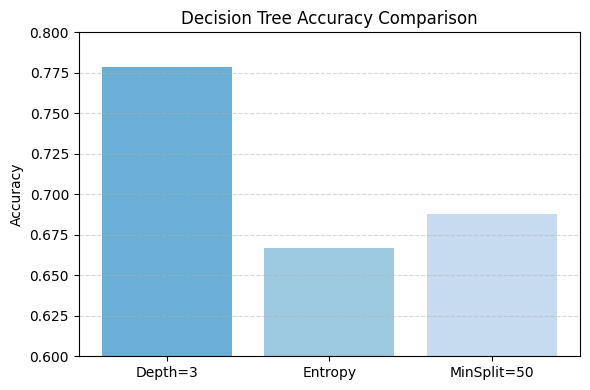

In [ ]:
import matplotlib.pyplot as plt

tree_labels = ['Depth=3', 'Entropy', 'MinSplit=50']
tree_accuracies = [acc1, acc2, acc3]

plt.figure(figsize=(6,4))
plt.bar(tree_labels, tree_accuracies, color=['#6baed6', '#9ecae1', '#c6dbef'])
plt.ylim(0.6, 0.8)
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


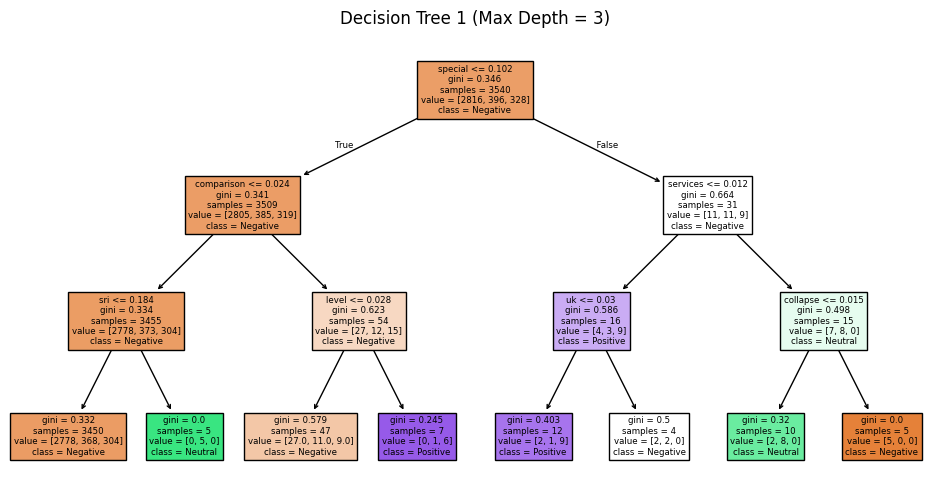

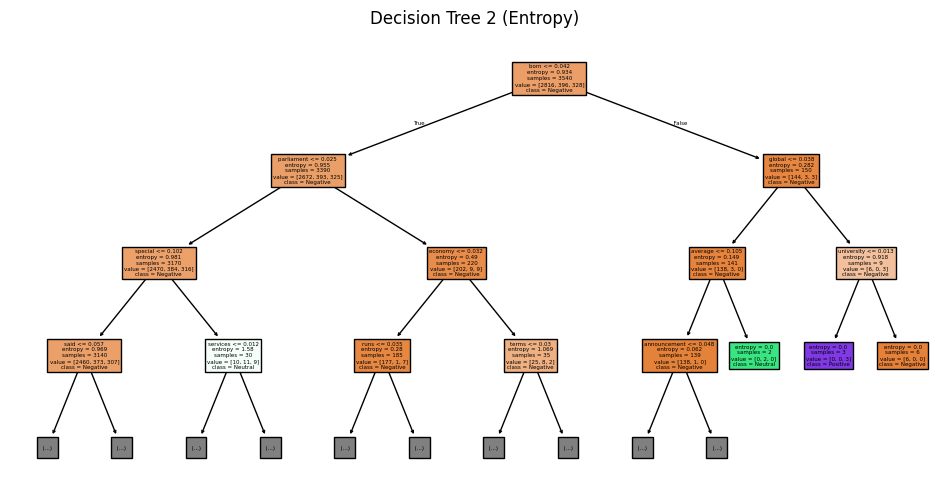

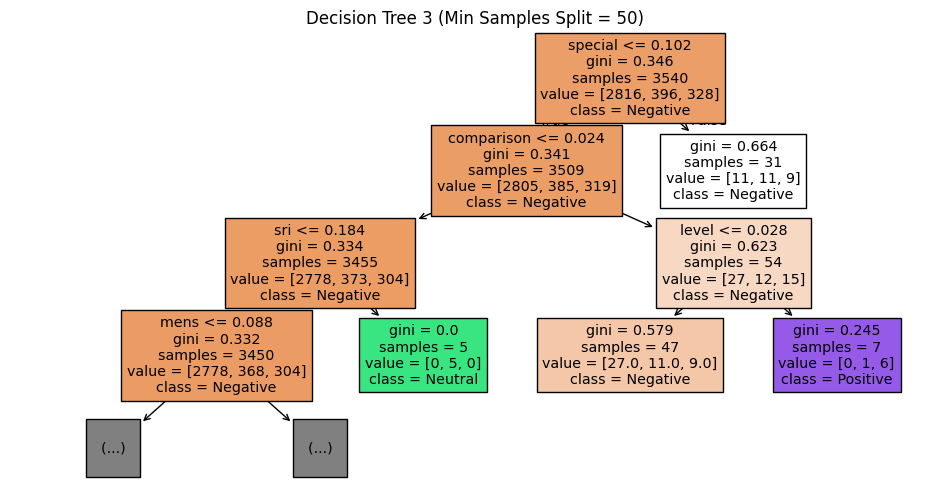

In [ ]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Tree 1: Depth-limited
plt.figure(figsize=(12, 6))
plot_tree(tree_depth3, max_depth=3, feature_names=vectorizer.get_feature_names_out(), class_names=['Negative', 'Neutral', 'Positive'], filled=True)
plt.title("Decision Tree 1 (Max Depth = 3)")
plt.show()

# Tree 2: Entropy-based
plt.figure(figsize=(12, 6))
plot_tree(tree_entropy, max_depth=3, feature_names=vectorizer.get_feature_names_out(), class_names=['Negative', 'Neutral', 'Positive'], filled=True)
plt.title("Decision Tree 2 (Entropy)")
plt.show()

# Tree 3: Min samples split
plt.figure(figsize=(12, 6))
plot_tree(tree_minsplit, max_depth=3, feature_names=vectorizer.get_feature_names_out(), class_names=['Negative', 'Neutral', 'Positive'], filled=True)
plt.title("Decision Tree 3 (Min Samples Split = 50)")
plt.show()

Decision Tree 1 (Max Depth = 3) Accuracy: 0.7785
              precision    recall  f1-score   support

    Negative       0.78      0.99      0.88       692
     Neutral       0.00      0.00      0.00        95
    Positive       0.17      0.01      0.02        98

    accuracy                           0.78       885
   macro avg       0.32      0.33      0.30       885
weighted avg       0.63      0.78      0.69       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


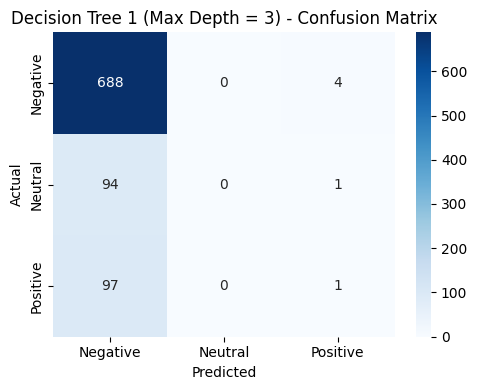

Decision Tree 2 (Entropy) Accuracy: 0.6667
              precision    recall  f1-score   support

    Negative       0.79      0.82      0.80       692
     Neutral       0.12      0.11      0.11        95
    Positive       0.17      0.14      0.15        98

    accuracy                           0.67       885
   macro avg       0.36      0.36      0.36       885
weighted avg       0.65      0.67      0.66       885



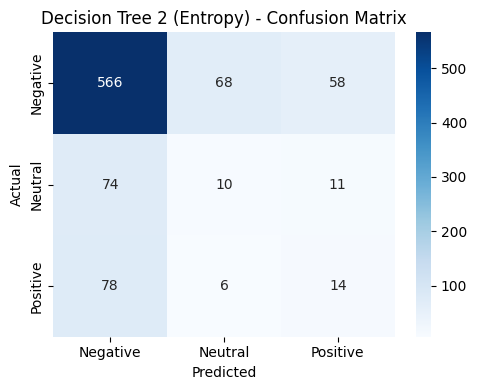

Decision Tree 3 (Min Samples Split = 50) Accuracy: 0.6881
              precision    recall  f1-score   support

    Negative       0.79      0.85      0.82       692
     Neutral       0.10      0.08      0.09        95
    Positive       0.17      0.10      0.13        98

    accuracy                           0.69       885
   macro avg       0.35      0.35      0.35       885
weighted avg       0.65      0.69      0.67       885



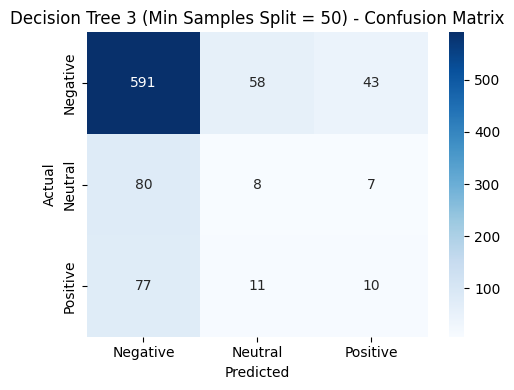

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to display results
def show_results(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{title} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"]))
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Tree 1: Max Depth = 3
show_results(tree_depth3, X_test, y_test, "Decision Tree 1 (Max Depth = 3)")

# Tree 2: Entropy-based
show_results(tree_entropy, X_test, y_test, "Decision Tree 2 (Entropy)")

# Tree 3: Min Samples Split = 50
show_results(tree_minsplit, X_test, y_test, "Decision Tree 3 (Min Samples Split = 50)")

# Regression

In [1]:
import pandas as pd

df = pd.read_csv("guardian_cleaned_dataset.csv")

df.info(), df.head(), df['section'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4425 non-null   object 
 1   headline          4425 non-null   object 
 2   section           4425 non-null   object 
 3   publication_date  4425 non-null   object 
 4   url               4425 non-null   object 
 5   author            4212 non-null   object 
 6   keywords          4415 non-null   object 
 7   body_text         4425 non-null   object 
 8   sentiment         4425 non-null   float64
dtypes: float64(1), object(8)
memory usage: 311.3+ KB


(None,
                                                   id  \
 0  politics/2025/feb/03/most-zero-hours-workers-w...   
 1  politics/2025/feb/02/starmer-calls-on-european...   
 2  politics/2025/feb/02/keir-starmer-european-def...   
 3  politics/2025/feb/02/cooper-defends-starmer-af...   
 4  politics/2025/feb/02/eluned-morgan-south-wales...   
 
                                             headline   section  \
 0  most zero-hours workers ‘with same employer fo...  Politics   
 1  starmer calls on european leaders to put more ...  Politics   
 2  keir starmer to discuss european defence with ...  Politics   
 3  cooper defends starmer after book says chief o...  Politics   
 4  ‘reform is a challenge’: eluned morgan hits so...  Politics   
 
        publication_date                                                url  \
 0  2025-02-03T00:07:24Z  https://www.theguardian.com/politics/2025/feb/...   
 1  2025-02-02T22:30:23Z  https://www.theguardian.com/politics/2025/feb/...   
 2  2025

In [ ]:
section_counts = df['section'].value_counts()
section_counts

,count
section,
Business,500
World news,500
Technology,500
Environment,500
Politics,499
Culture,499
Science,499
Sport,495
Education,433


In [ ]:
# Reload the dataset after re-upload
df = pd.read_csv("/mnt/data/guardian_cleaned_dataset.csv")

# Filter to only Business and Technology sections
binary_df = df[df['section'].isin(['Business', 'Technology'])].copy()
binary_df['label'] = binary_df['section'].map({'Business': 0, 'Technology': 1})

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(binary_df['body_text'])
y = binary_df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Show split sizes
split_summary = pd.DataFrame({
    "Subset": ["Training Set", "Testing Set"],
    "Number of Samples": [len(X_train), len(X_test)]
})

split_summary

In [5]:
# Re-import required libraries after code execution state reset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: View first few rows of raw data
raw_sample = df[['headline', 'section', 'body_text', 'sentiment']].head()

# Step 2: Filter to only Business and Technology
binary_df = df[df['section'].isin(['Business', 'Technology'])].copy()

# Step 3: Label Encoding
binary_df['label'] = binary_df['section'].map({'Business': 0, 'Technology': 1})

# Step 4: Add word count for visualization
binary_df['word_count'] = binary_df['body_text'].apply(lambda x: len(str(x).split()))

# Step 5: Summary after preprocessing
preprocessed_sample = binary_df[['headline', 'section', 'label', 'word_count']].head()

# Step 6: Count of articles per class
section_distribution = binary_df['section'].value_counts()

# Step 7: TF-IDF Vectorization preview (10 features for display)
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
X_sample = vectorizer.fit_transform(binary_df['body_text'])
tfidf_feature_names = vectorizer.get_feature_names_out()

# Display raw dataset sample
print("Raw Sample from Dataset:\n")
print(raw_sample.to_markdown(index=False))

# Display preprocessed dataset sample
print("\nPreprocessed Sample after Filtering and Label Encoding:\n")
print(preprocessed_sample.to_markdown(index=False))

# Display section distribution
print("\nSection Distribution (for Binary Classification):\n")
print(section_distribution.to_markdown())

# Display top 10 TF-IDF words (features)
print("\nTop 10 TF-IDF Feature Words:\n")
print(", ".join(tfidf_feature_names))


Raw Sample from Dataset:

| headline                                                                                  | section   | body_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Filtering & Preprocessing.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

binary_df = df[df['section'].isin(['Business', 'Technology'])].copy()

binary_df['label'] = binary_df['section'].map({'Business': 0, 'Technology': 1})

# TF-IDF Vectorization of 'body_text'
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(binary_df['body_text'])
y = binary_df['label']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shapes of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 3000), (200, 3000), (800,), (200,))

In [7]:
# Fixing sparse matrix length error by using .shape[0] to get row count
split_summary = pd.DataFrame({
    "Subset": ["Training Set", "Testing Set"],
    "Number of Samples": [X_train.shape[0], X_test.shape[0]]
})

split_summary

,Subset,Number of Samples
0,Training Set,800
1,Testing Set,200


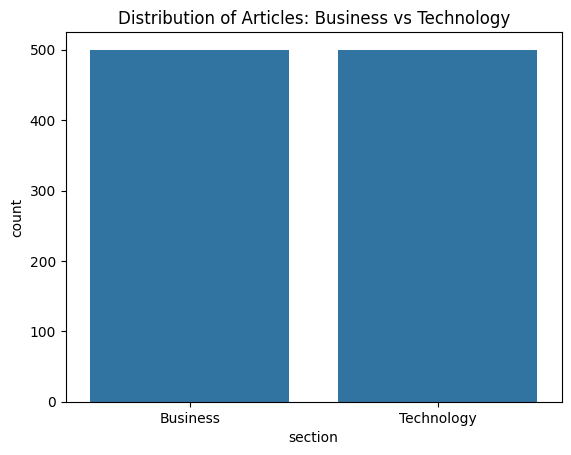

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='section', data=binary_df)
plt.title("Distribution of Articles: Business vs Technology")
plt.show()

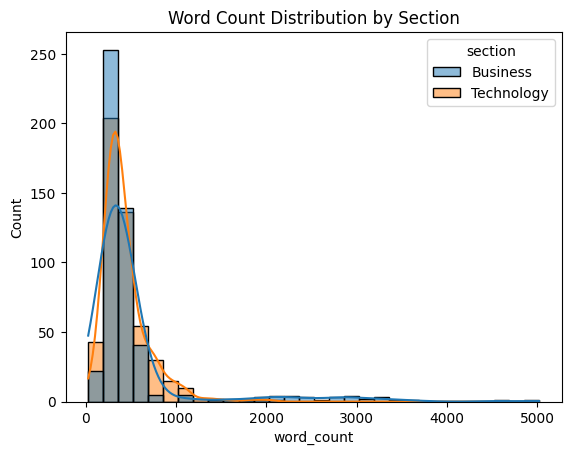

In [ ]:
binary_df['word_count'] = binary_df['body_text'].apply(lambda x: len(x.split()))
sns.histplot(binary_df, x='word_count', hue='section', bins=30, kde=True)
plt.title("Word Count Distribution by Section")
plt.show()

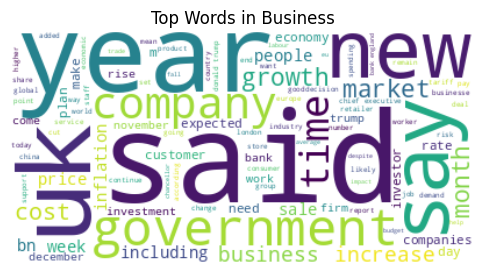

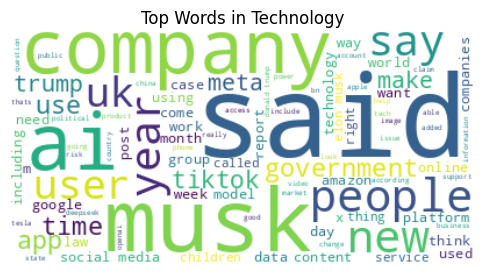

In [ ]:
from wordcloud import WordCloud

for label in ['Business', 'Technology']:
    text = " ".join(binary_df[binary_df['section'] == label]['body_text'])
    wordcloud = WordCloud(max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(6,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top Words in {label}")
    plt.show()

Train & Evaluate Models

Train Logistic Regression and Multinomial Naïve Bayes

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_preds)
lr_acc = accuracy_score(y_test, lr_preds)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
nb_cm = confusion_matrix(y_test, nb_preds)
nb_acc = accuracy_score(y_test, nb_preds)

{
    "Logistic Regression": {"Confusion Matrix": lr_cm.tolist(), "Accuracy": lr_acc},
    "Naive Bayes": {"Confusion Matrix": nb_cm.tolist(), "Accuracy": nb_acc}
}

{'Logistic Regression': {'Confusion Matrix': [[92, 4], [5, 99]],
  'Accuracy': 0.955},
 'Naive Bayes': {'Confusion Matrix': [[93, 3], [4, 100]], 'Accuracy': 0.965}}

In [ ]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [0.955, 0.965],
    'True Positives': [99, 100],
    'True Negatives': [92, 93],
    'False Positives': [4, 3],
    'False Negatives': [5, 4]
})
results_df


,Model,Accuracy,True Positives,True Negatives,False Positives,False Negatives
0,Logistic Regression,0.955,99,92,4,5
1,Naive Bayes,0.965,100,93,3,4


In [ ]:
from sklearn.metrics import classification_report

# Generate classification reports
lr_report = classification_report(y_test, lr_preds, target_names=["Business", "Technology"])
nb_report = classification_report(y_test, nb_preds, target_names=["Business", "Technology"])

# Display the formatted reports
print("🔹 Logistic Regression Classification Report:\n")
print(lr_report)

print("\n🔹 Naive Bayes Classification Report:\n")
print(nb_report)


🔹 Logistic Regression Classification Report:

              precision    recall  f1-score   support

    Business       0.95      0.96      0.95        96
  Technology       0.96      0.95      0.96       104

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200


🔹 Naive Bayes Classification Report:

              precision    recall  f1-score   support

    Business       0.96      0.97      0.96        96
  Technology       0.97      0.96      0.97       104

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Confusion Matrix and Accuracy
dt_cm = confusion_matrix(y_test, dt_preds)
dt_acc = accuracy_score(y_test, dt_preds)
dt_report = classification_report(y_test, dt_preds, target_names=["Business", "Technology"])

# Return results
{
    "Confusion Matrix": dt_cm.tolist(),
    "Accuracy": dt_acc,
    "Classification Report": dt_report
}

{'Confusion Matrix': [[84, 12], [13, 91]],
 'Accuracy': 0.875,
 'Classification Report': '              precision    recall  f1-score   support\n\n    Business       0.87      0.88      0.87        96\n  Technology       0.88      0.88      0.88       104\n\n    accuracy                           0.88       200\n   macro avg       0.87      0.88      0.87       200\nweighted avg       0.88      0.88      0.88       200\n'}

In [ ]:
# Generate plain text classification report for Decision Tree (like the one in the image)
from sklearn.metrics import classification_report

# Generate the plain text report
dt_report_text = classification_report(y_test, dt_preds, target_names=["Business", "Technology"])

# Print the plain report
print("🔹 Decision Tree Classification Report:\n")
print(dt_report_text)

🔹 Decision Tree Classification Report:

              precision    recall  f1-score   support

    Business       0.87      0.88      0.87        96
  Technology       0.88      0.88      0.88       104

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



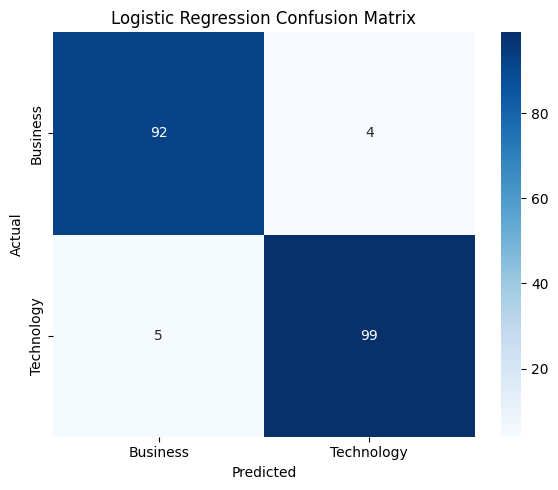

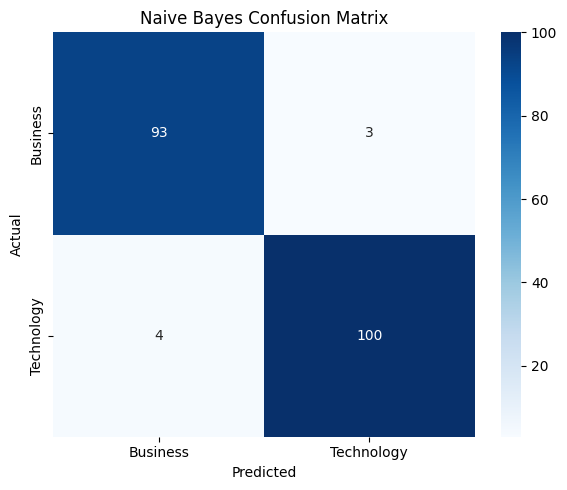

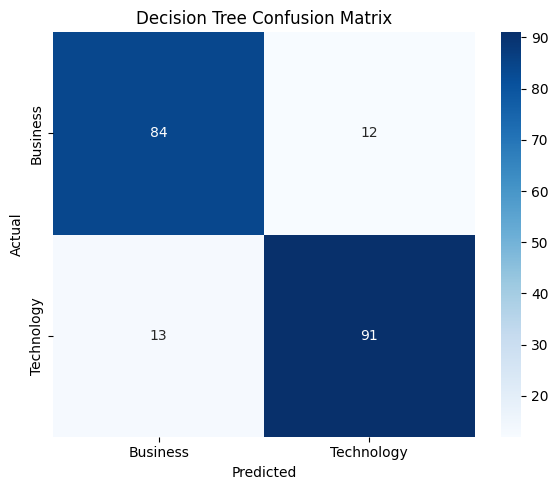

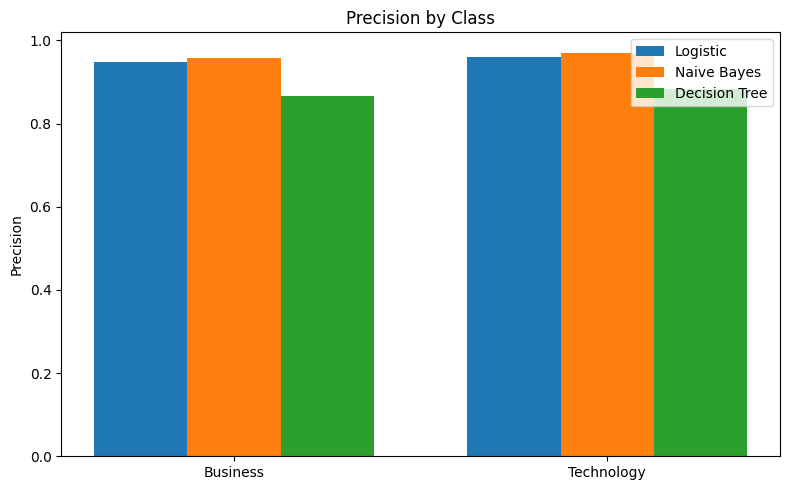

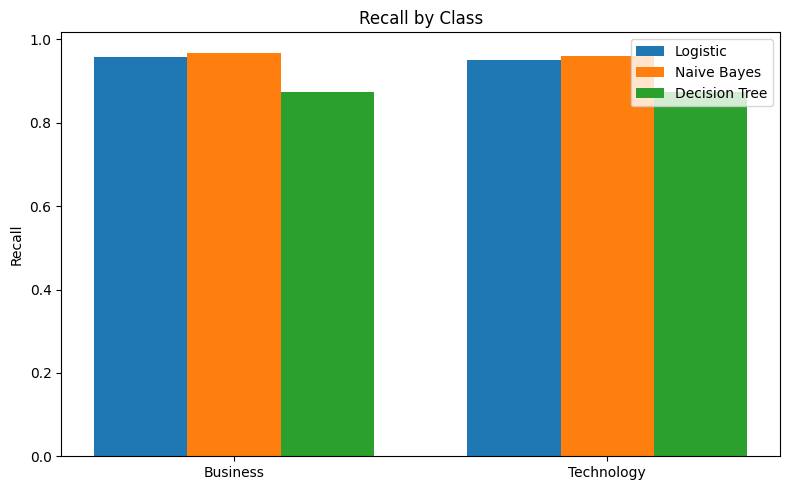

🔹 Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Business       0.95      0.96      0.95        96
  Technology       0.96      0.95      0.96       104

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200


🔹 Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Business       0.96      0.97      0.96        96
  Technology       0.97      0.96      0.97       104

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200


🔹 Decision Tree Classification Report:
               precision    recall  f1-score   support

    Business       0.87      0.88      0.87        96
  Technology       0.88      0.88      0.88       104

    accuracy                           0.88       200
  

In [ ]:
# Re-import and re-run everything after code execution reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter to Business and Technology only
binary_df = df[df['section'].isin(['Business', 'Technology'])].copy()
binary_df['label'] = binary_df['section'].map({'Business': 0, 'Technology': 1})

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(binary_df['body_text'])
y = binary_df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Classification reports
lr_report = classification_report(y_test, lr_preds, target_names=["Business", "Technology"])
nb_report = classification_report(y_test, nb_preds, target_names=["Business", "Technology"])
dt_report = classification_report(y_test, dt_preds, target_names=["Business", "Technology"])

# Confusion matrices
lr_cm = confusion_matrix(y_test, lr_preds)
nb_cm = confusion_matrix(y_test, nb_preds)
dt_cm = confusion_matrix(y_test, dt_preds)

# Plot function
def plot_confusion(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Business", "Technology"], yticklabels=["Business", "Technology"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Confusion Matrix Visualizations
plot_confusion(lr_cm, "Logistic Regression Confusion Matrix")
plot_confusion(nb_cm, "Naive Bayes Confusion Matrix")
plot_confusion(dt_cm, "Decision Tree Confusion Matrix")

# Precision and Recall Bar Plots
lr_prec, lr_rec, _, _ = precision_recall_fscore_support(y_test, lr_preds, labels=[0, 1])
nb_prec, nb_rec, _, _ = precision_recall_fscore_support(y_test, nb_preds, labels=[0, 1])
dt_prec, dt_rec, _, _ = precision_recall_fscore_support(y_test, dt_preds, labels=[0, 1])

x = np.arange(2)
width = 0.25

# Precision Plot
plt.figure(figsize=(8, 5))
plt.bar(x - width, lr_prec, width, label='Logistic')
plt.bar(x, nb_prec, width, label='Naive Bayes')
plt.bar(x + width, dt_prec, width, label='Decision Tree')
plt.xticks(x, ['Business', 'Technology'])
plt.ylabel("Precision")
plt.title("Precision by Class")
plt.legend()
plt.tight_layout()
plt.show()

# Recall Plot
plt.figure(figsize=(8, 5))
plt.bar(x - width, lr_rec, width, label='Logistic')
plt.bar(x, nb_rec, width, label='Naive Bayes')
plt.bar(x + width, dt_rec, width, label='Decision Tree')
plt.xticks(x, ['Business', 'Technology'])
plt.ylabel("Recall")
plt.title("Recall by Class")
plt.legend()
plt.tight_layout()
plt.show()

# Display text reports
print("🔹 Logistic Regression Classification Report:\n", lr_report)
print("\n🔹 Naive Bayes Classification Report:\n", nb_report)
print("\n🔹 Decision Tree Classification Report:\n", dt_report)

Multiclass Classification Setup

In [ ]:
# Reload the dataset after upload
df = pd.read_csv("guardian_cleaned_dataset.csv")

# Encode the section labels (multiclass)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['section'])

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_multi = vectorizer.fit_transform(df['body_text'])
y_multi = df['label']

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

# Output shapes and number of classes
X_train_multi.shape, X_test_multi.shape, len(le.classes_), list(le.classes_)

((3540, 3000),
 (885, 3000),
 9,
 ['Business',
  'Culture',
  'Education',
  'Environment',
  'Politics',
  'Science',
  'Sport',
  'Technology',
  'World news'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train models
lr_multi = LogisticRegression(max_iter=1000)
lr_multi.fit(X_train_multi, y_train_multi)
lr_preds = lr_multi.predict(X_test_multi)

nb_multi = MultinomialNB()
nb_multi.fit(X_train_multi, y_train_multi)
nb_preds = nb_multi.predict(X_test_multi)

dt_multi = DecisionTreeClassifier(random_state=42)
dt_multi.fit(X_train_multi, y_train_multi)
dt_preds = dt_multi.predict(X_test_multi)

# Evaluate
lr_acc = accuracy_score(y_test_multi, lr_preds)
nb_acc = accuracy_score(y_test_multi, nb_preds)
dt_acc = accuracy_score(y_test_multi, dt_preds)

# Reports
lr_report = classification_report(y_test_multi, lr_preds, target_names=le.classes_)
nb_report = classification_report(y_test_multi, nb_preds, target_names=le.classes_)
dt_report = classification_report(y_test_multi, dt_preds, target_names=le.classes_)

# Return summaries
{
    "Logistic Regression Accuracy": lr_acc,
    "Naive Bayes Accuracy": nb_acc,
    "Decision Tree Accuracy": dt_acc,
}

{'Logistic Regression Accuracy': 0.8598870056497175,
 'Naive Bayes Accuracy': 0.8305084745762712,
 'Decision Tree Accuracy': 0.6067796610169491}

In [ ]:
# Display all classification reports
print("🔹 Logistic Regression Classification Report:\n")
print(lr_report)

print("\n🔹 Naive Bayes Classification Report:\n")
print(nb_report)

print("\n🔹 Decision Tree Classification Report:\n")
print(dt_report)

🔹 Logistic Regression Classification Report:

              precision    recall  f1-score   support

    Business       0.78      0.81      0.79        95
     Culture       0.86      0.91      0.88        86
   Education       0.91      0.95      0.93        78
 Environment       0.77      0.89      0.83       103
    Politics       0.87      0.76      0.81       110
     Science       0.88      0.85      0.87       114
       Sport       0.97      0.93      0.95       101
  Technology       0.90      0.81      0.85        93
  World news       0.83      0.86      0.85       105

    accuracy                           0.86       885
   macro avg       0.86      0.86      0.86       885
weighted avg       0.86      0.86      0.86       885


🔹 Naive Bayes Classification Report:

              precision    recall  f1-score   support

    Business       0.76      0.82      0.79        95
     Culture       0.79      0.88      0.84        86
   Education       0.87      0.96      0.91    

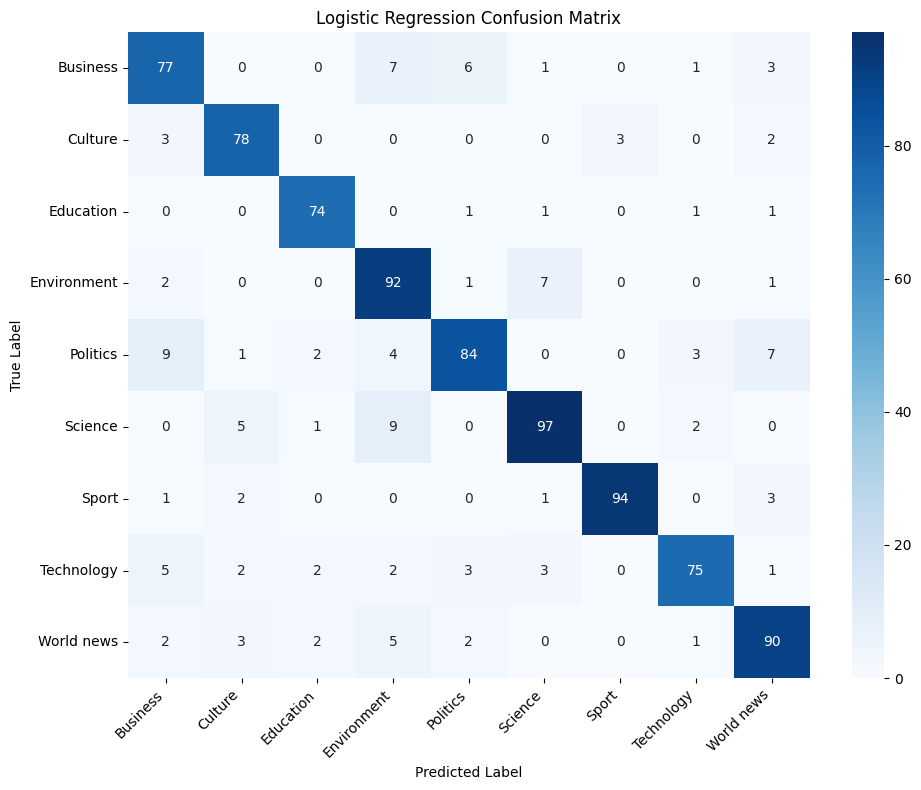

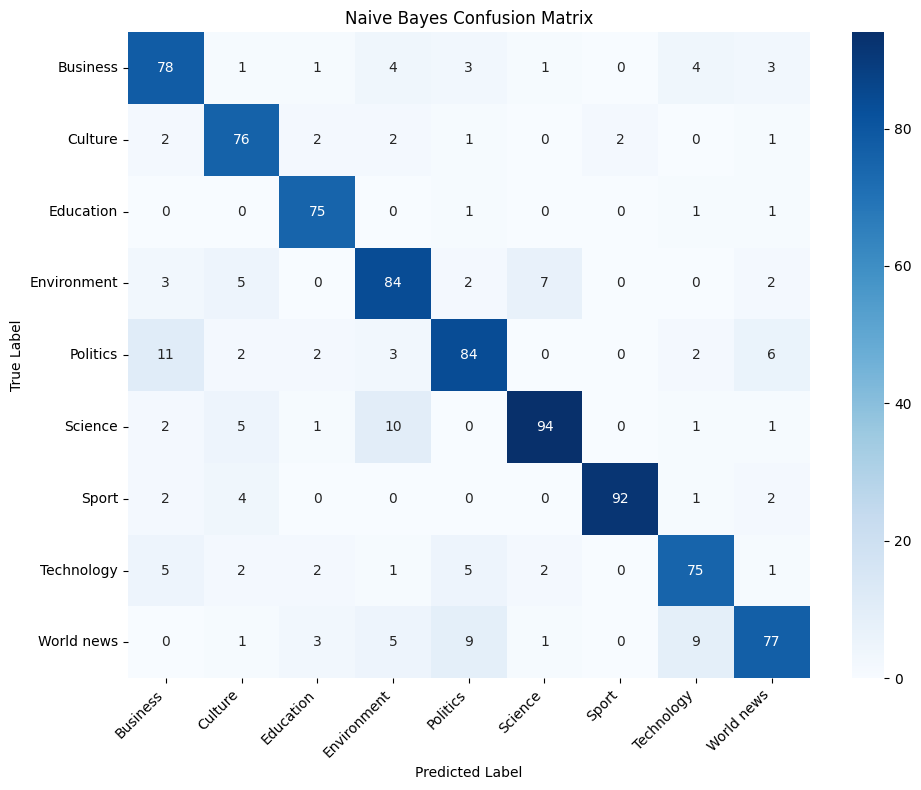

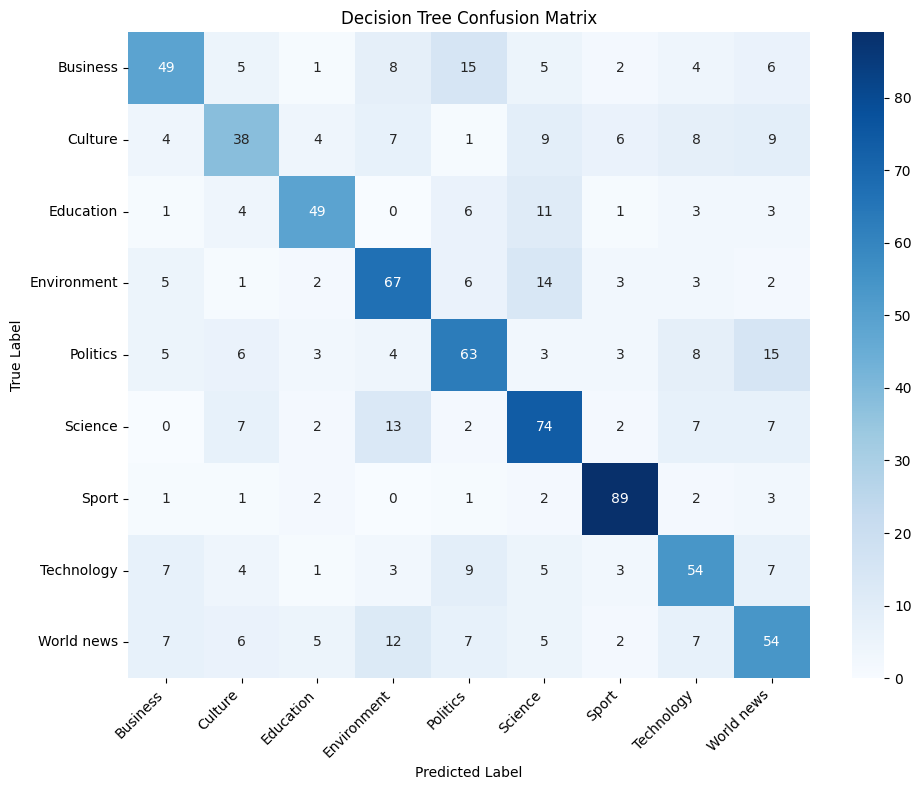

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
lr_cm = confusion_matrix(y_test_multi, lr_preds)
nb_cm = confusion_matrix(y_test_multi, nb_preds)
dt_cm = confusion_matrix(y_test_multi, dt_preds)

# Class labels
labels = le.classes_

# Plot function
def plot_confusion(cm, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
plot_confusion(lr_cm, "Logistic Regression Confusion Matrix")
plot_confusion(nb_cm, "Naive Bayes Confusion Matrix")
plot_confusion(dt_cm, "Decision Tree Confusion Matrix")

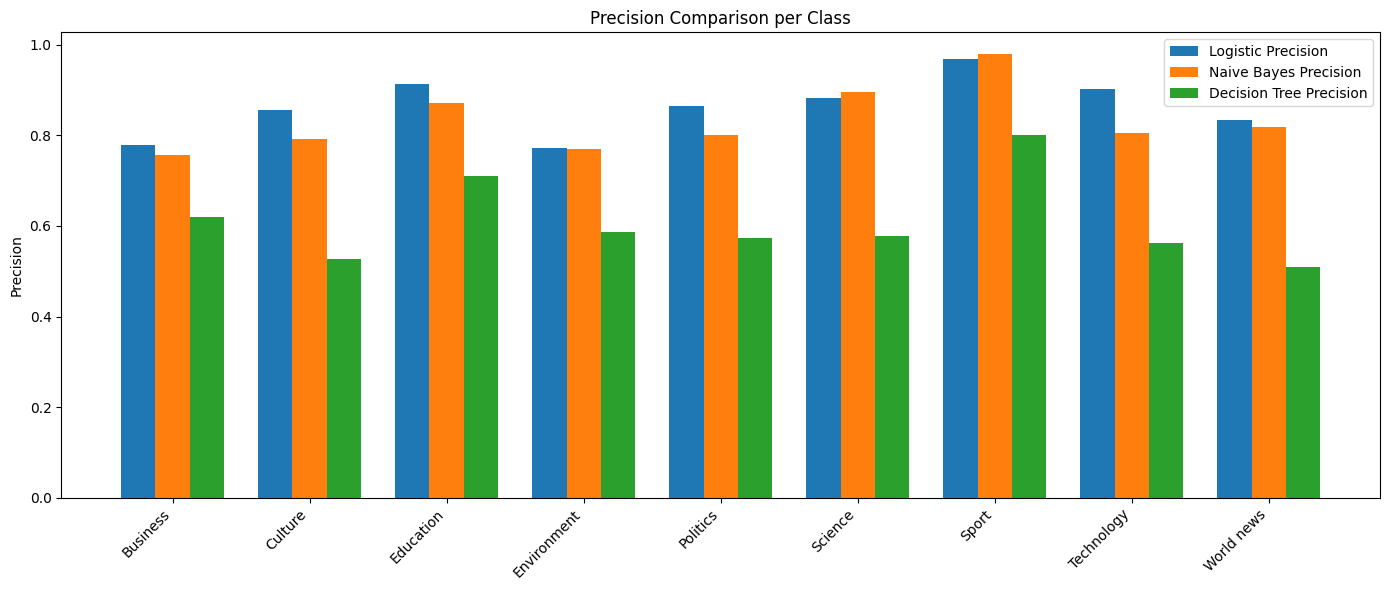

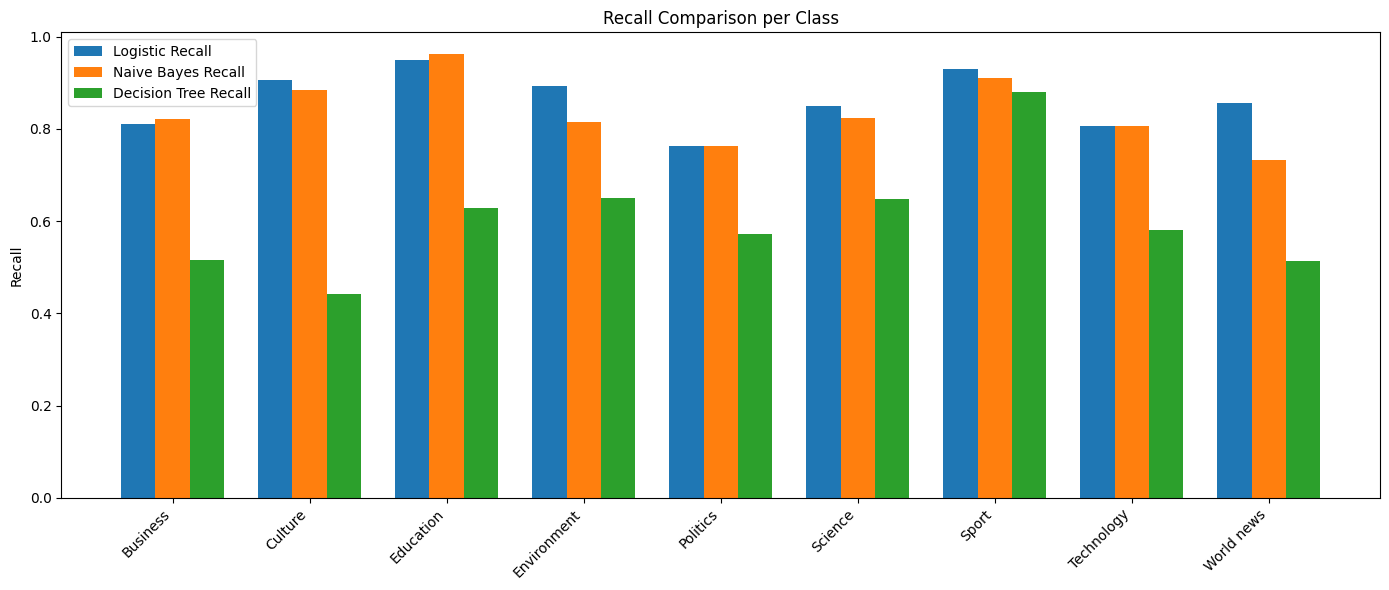

In [ ]:
import numpy as np

# Extract values for plotting precision and recall per class
from sklearn.metrics import precision_recall_fscore_support

# Get metrics for each model
lr_prec, lr_rec, _, _ = precision_recall_fscore_support(y_test_multi, lr_preds, labels=np.arange(len(labels)))
nb_prec, nb_rec, _, _ = precision_recall_fscore_support(y_test_multi, nb_preds, labels=np.arange(len(labels)))
dt_prec, dt_rec, _, _ = precision_recall_fscore_support(y_test_multi, dt_preds, labels=np.arange(len(labels)))

x = np.arange(len(labels))  # label indices
width = 0.25

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(x - width, lr_prec, width, label='Logistic Precision')
plt.bar(x, nb_prec, width, label='Naive Bayes Precision')
plt.bar(x + width, dt_prec, width, label='Decision Tree Precision')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("Precision")
plt.title("Precision Comparison per Class")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.bar(x - width, lr_rec, width, label='Logistic Recall')
plt.bar(x, nb_rec, width, label='Naive Bayes Recall')
plt.bar(x + width, dt_rec, width, label='Decision Tree Recall')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("Recall")
plt.title("Recall Comparison per Class")
plt.legend()
plt.tight_layout()
plt.show()

Train-Test Split Distribution

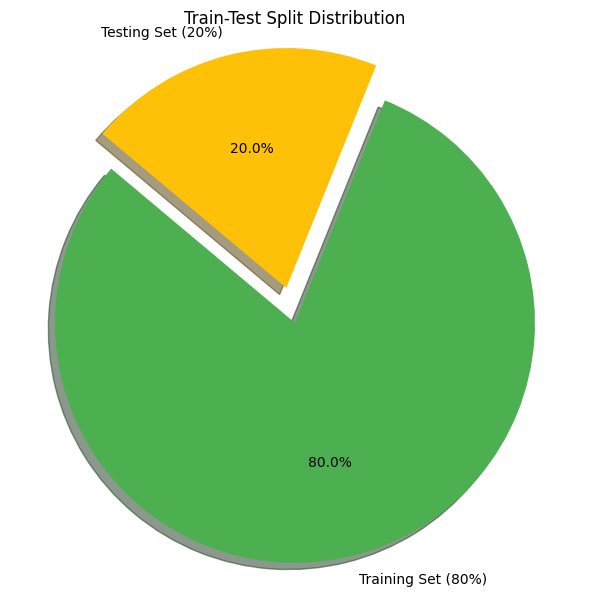

In [ ]:
import matplotlib.pyplot as plt

# Pie chart to visualize 80/20 train-test split
labels = ['Training Set (80%)', 'Testing Set (20%)']
sizes = [80, 20]
colors = ['#4CAF50', '#FFC107']
explode = (0.05, 0.1)  # separate the slices a bit for emphasis

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, explode=explode)
plt.title('Train-Test Split Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()
